# 機械学習講座  Lab第2回


*******************************************************************************
code is modified and translated by Yuki Saito at 2020/12/12.
All rights are reseraved to Ecole Central de nantes L2SN and Keio University.
*******************************************************************************



# Introductory Lab2


このLabでは前章で扱ったクラスタリングタスクをさらに掘り下げて，より実践的なアルゴリズムとその使用方法を学びます．
使用するライブラリは前回同様にNumpy と　Scikit-Learn です．また今回は自分のPC上にローカル保存されている
csv拡張子を読み込み，学習,テスト用データとして使用します．今回学ぶアルゴリズムは以下の3種類です．
*   K-means   
*   K-medoids 
*   応用: Non-Euclidian Clustering (グラフカットを用いたスペクトラルクラスタリング)

**GOALS**: 

１）Clusteringの代表的なアルゴリズムとしてK-mean, K-medoidsを使用できるようにする．

２）クラスタリング問題におけるハイパーパラメータの決め方を学ぶ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.cluster as skc
import pandas as pd

### Syntheticデータセットの読み込み(人工的に生成したデータ)

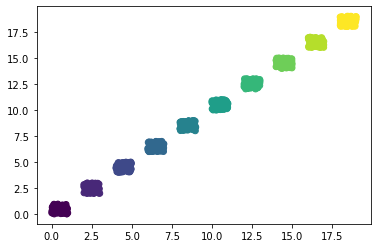

(2, 1000)


In [3]:
synNbClasses = 10;

syn=np.empty([2, 0]);
synLabels=[];
for k in range(synNbClasses):
    syn = np.concatenate((syn, np.random.rand(2, 100)+2*k), axis=-1);
    synLabels = np.concatenate((synLabels, np.ones(100)*k));
plt.scatter(syn[0, :], syn[1, :], c=synLabels);
plt.show();

print(syn.shape)

### Realデータセット(ある実際に存在する統計データに関するデータセット)

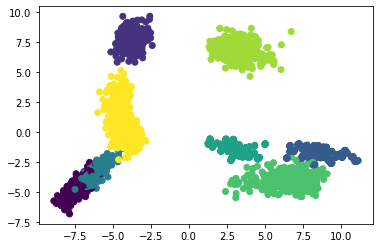

(2400, 1024)


In [4]:
reaNbClasses = 8;

rea1 = np.loadtxt('../data/data1.csv')
rea2 = np.loadtxt('../data/data2.csv')
rea = np.concatenate((rea1, rea2))

reaLabels = rea[:, 0];
rea = rea[:, 1:];

from sklearn.decomposition import PCA
pca = PCA(n_components=2)     
pca.fit(rea)               
pca_transformed = pca.transform(rea)
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=reaLabels);
plt.show();

print(rea.shape)

## ユークリッド距離を用いたクラスタリング例(K-means, K-medoids)

ground truth =  [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 

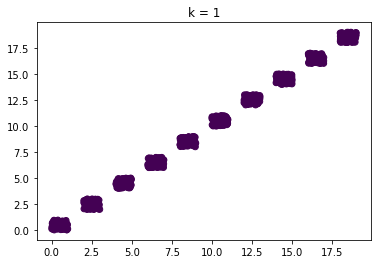

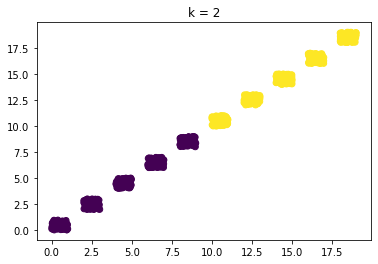

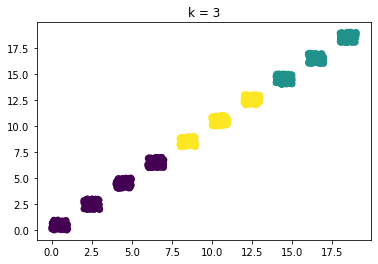

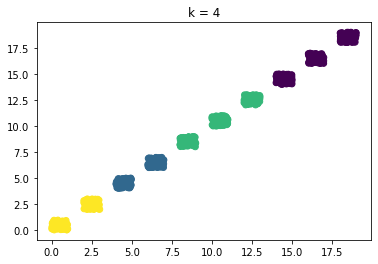

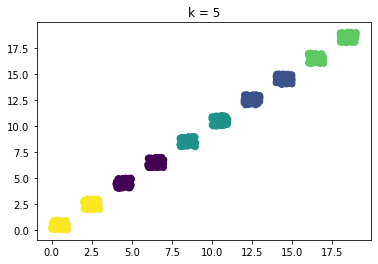

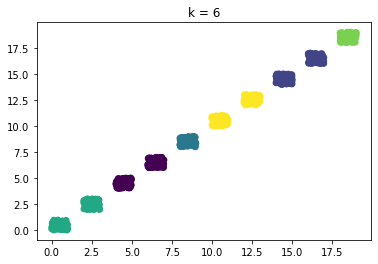

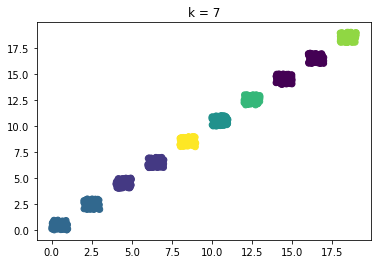

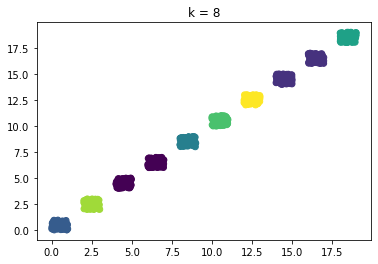

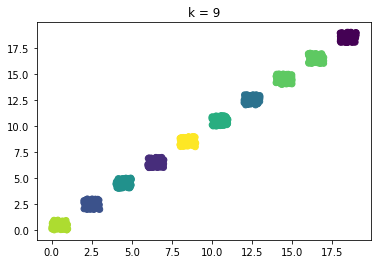

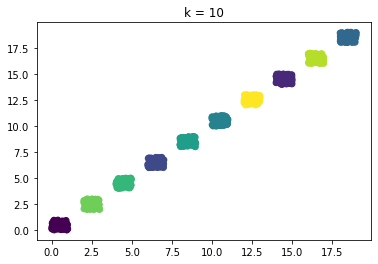

In [5]:
res = sk.cluster.KMeans(n_clusters=synNbClasses).fit(syn.T);
print('ground truth = ', res.labels_)
print('pred = ', synLabels)
synScore = sk.metrics.adjusted_mutual_info_score(synLabels, res.labels_)
print('inertia_score (SyntheticDataset) = ', synScore)    

In [6]:
res = sk.cluster.KMeans(n_clusters=reaNbClasses).fit(rea);
reaScore = sk.metrics.adjusted_mutual_info_score(reaLabels, res.labels_)
print('inertia_score (RealDataset) = ', reaScore)

inertia_score (RealDataset) =  0.9165865684157524


## k-meansのハイパーパラメータ k の決め方(Gap統計量)

[[17.21901225  5.96061167]
 [ 6.45928334 17.21397287]
 [ 6.92135493 18.94269334]
 ...
 [17.65430342 15.82748252]
 [12.7191652  10.24690181]
 [12.83242755  0.33114388]]
now calculating gap statistic... k=1 gap=0.9014658417772241
rand_inertia =  59696.22560228864
res_inertia =  66221.2840861486
now calculating gap statistic... k=2 gap=2.2758848907668203
rand_inertia =  36739.02559077976
res_inertia =  16142.74330825281
now calculating gap statistic... k=3 gap=3.1199677939942068
rand_inertia =  22924.590124028135
res_inertia =  7347.700885937639
now calculating gap statistic... k=4 gap=3.5817221707548543
rand_inertia =  14886.913591405417
res_inertia =  4156.356322932767
now calculating gap statistic... k=5 gap=5.713222841678606
rand_inertia =  12481.699167225881
res_inertia =  2184.703715067873
now calculating gap statistic... k=6 gap=5.975181441227952
rand_inertia =  10379.6978773162
res_inertia =  1737.135178138303
now calculating gap statistic... k=7 gap=6.580285657684089
rand_inertia

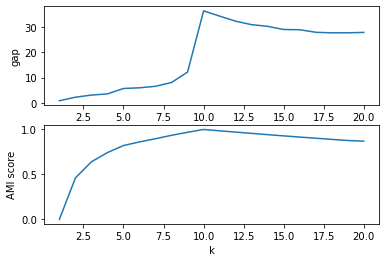

In [10]:
# this shows the effectiveness of gap statistic for synthetic dataset.

max_cluster = 20; #reaNbClasses;
dataset = syn.T
dataset_labels = synLabels
gaps = []
ks = list(range(max_cluster)) 
for i in ks:
    ks[i] += 1

    
def get_rand_data(data): 
    #return random data (null)
    max_data = np.amax(data, axis=0)
    min_data = np.amin(data, axis=0)
    import random
    rand_ = np.random.uniform(min_data, max_data, (data.shape[0], data.shape[1]))
    #rand_ = np.random.rand(data.shape[0], data.shape[1])
    return rand_

data_rand = get_rand_data(dataset) 

    
for k in ks:
    res_rand = sk.cluster.KMeans(n_clusters=k).fit(data_rand)
    res = sk.cluster.KMeans(n_clusters=k).fit(dataset)
    gap = res_rand.inertia_ / res.inertia_ 
    print('now calculating gap statistic... k={} gap={}'.format(k, gap))
    print('rand_inertia = ', res_rand.inertia_)
    print('res_inertia = ', res.inertia_)
    gaps.append(gap)
    
    
plt.subplot(2,1,1)
plt.xlabel(" k ") 
plt.ylabel("gap")
left = np.array(ks)
height = np.array(gaps)
plt.plot(left, height)




#validate if predicted cluster size is appropiate.
reaScores = []
for k in ks:
    res = sk.cluster.KMeans(n_clusters=k).fit(dataset);
    reaScore = sk.metrics.adjusted_mutual_info_score(dataset_labels, res.labels_)
    reaScores.append(reaScore)
    
plt.subplot(2,1,2)
plt.xlabel(" k ") 
plt.ylabel("AMI score")
left = np.array(ks)
height = np.array(reaScores)
plt.plot(left, height)
    
# you can see the the gap score gets the maximimum values at k = 10
#at the same time, the AMI score gets the mimimum values at k = 10
## this means, k = 10 is the most preferable parameter size in k = 1~20

## 復習問題（k-means アルゴリズム）:
    
1)プログラムを実行してk-meansのクラスタリング結果とその精度を示してください.


2)RealデータセットとSyntheticデータセットを同条件で比較して，どちらの方が精度が高かったのかを考察してください.


3)機械学習におけるハイパーパラメータの決め方はたくさんありますが，k-meansを用いる際に効果的な手法の一つとして今回は
Gap統計量を学習しました．Gap統計量を計算するコードを実装してください．


4) 上記3)の結果, 最適だと言えるkの値を求めてください(RealデータセットとSyntheticデータセット両方)．
またテストデータを使って精度を実際に計算し，
Gap統計量から計算したkの値が最適であることを証明してください．


## 応用: スペクトラルクラスタリング (NonEuclidian Space Clustering)

In [ ]:

###############################################
# this is code for 5 non euclidian clustering
###############################################

# correspond to (b) 
def node_L2_distances(X, Y):
    #Calculate L2 distances . Note that X and Y are the same matrix.
    distances = np.empty((X.shape[0], Y.shape[0]), dtype='float')
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            distances[i, j] = np.linalg.norm(X[i]-Y[j], ord=2) ** 2
    return distances


# correspond to (a) 
def nearest_neighbor_graph(X, gamma=1):
    #calculate pairwise distances
    A = node_L2_distances(X, X)  
    W = np.exp(-A/(2*gamma**2))
    return W



#use if you wanna set the rbf only for the node's neighborsand 
#the other nodes are set to be 0
#for default, use the above nearest_neighbor_graph(X, gamma=1) instead of this function for part (a).
def nearest_neighbor_graph_(X, gamma=1 ,n_neighbors = 100):
    if n_neighbors > X.shape[0]:
        print('Error: the neighbor node size is invalid...')
    A = node_L2_distances(X, X)  
    sorted_rows_ix_by_dist = np.argsort(A, axis=1)
    #pick up first n_neighbors for each point (i.e. each row)
    nearest_neighbor_index = sorted_rows_ix_by_dist[:, 1:n_neighbors+1]
    W = np.zeros(A.shape)
    #for each row, set the entries corresponding to n_neighbors to rbf value
    for row in range(W.shape[0]):
        W[row, nearest_neighbor_index[row]] = np.exp(-W[row, nearest_neighbor_index[row]]/(2*gamma**2))

    #make matrix symmetric by setting edge between two points 
    for r in range(W.shape[0]):
        for c in range(W.shape[0]):
            if(W[r,c] != 0):
                W[c,r] = np.exp(-W[c,r]/(2*gamma**2))
    return W

# correspond to (c) (d)
def compute_laplacian(W):
    #  L = D - W
    d = W.sum(axis=1)
    #create degree matrix
    D = np.diag(d)
    L =  D - W
    return L

# correspond to (e) (f)
def get_eigvecs(L, k):
    #Calculate Eigenvalues and EigenVectors of the Laplacian Matrix.
    eigvals, eigvecs = np.linalg.eig(L)
    #to make sure that eigen vev and values are real value, not complex value which will be error
    eigvals = eigvals.real
    eigvecs = eigvecs.real
    # sort eigenvalues and select k smallest values - get their indices
    ix_sorted_eig = np.argsort(eigvals)[:k]
    #select k eigenvectors corresponding to k-smallest eigenvalues
    return eigvecs[:,ix_sorted_eig]

"""

dataset = syn.T
dataset_labels = synLabels
ks = list(range(30)) 
for i in ks:
    ks[i] += 1

W = nearest_neighbor_graph_(dataset)
L = compute_laplacian(W)
reaScores = []
reaScores_scipy = []
for k in ks:
    E = get_eigvecs(L, k)
    kmeans_result = sk.cluster.KMeans(n_clusters=k).fit(E);  # correspond to (g)
    reaScore = sk.metrics.adjusted_mutual_info_score(dataset_labels, kmeans_result.labels_)
    print('k[{}] my code = {}'.format(k, reaScore))
    reaScores.append(reaScore)
    
    clustering = skc.SpectralClustering(n_clusters=k, affinity='rbf', gamma = 1/2, random_state=None).fit(dataset)
    reaScore_scipy = sk.metrics.adjusted_mutual_info_score(dataset_labels, clustering.labels_)
    print('k[{}] scipy code = {}'.format(k, reaScore_scipy))
    reaScores_scipy.append(reaScore_scipy)
    
    

    
plt.subplot(1,1,1)
plt.figure
plt.xlabel(" k ") 
plt.ylabel("AMI score")
left = np.array(ks)
height = np.array(reaScores)
plt.plot(left, height)
height2=np.array(reaScores_scipy)
plt.plot(left, height2)

"""

In [ ]:
reaScores_gammas = []
k = 10
gammas = [round(i * 0.1, 2) for i in range(1, 21, 1)]
print(gammas)

for gamma in gammas:
    W = nearest_neighbor_graph(dataset, 1/gamma)
    L = compute_laplacian(W)
    E = get_eigvecs(L, k)
    kmeans_result = sk.cluster.KMeans(n_clusters=k).fit(E);
    reaScore = sk.metrics.adjusted_mutual_info_score(dataset_labels, kmeans_result.labels_)
    print('k[{}] gamma[{}]  = my code = {}'.format(k, gamma, reaScore))
    reaScores_gammas.append(reaScore)
    
plt.subplot(1,1,1)
plt.xlabel(" gamma ") 
plt.ylabel("AMI score")
left = np.array(gammas)
height = np.array(reaScores_gammas)
plt.plot(left, height)

In [20]:
#####    conclusion
##### summrise performance on two dataset woth 2 different algorithm
#####
dataset = rea
dataset_labels = reaLabels
ks = list(range(30)) 
for i in ks:
    ks[i] += 1

W = nearest_neighbor_graph(dataset, 1)
L = compute_laplacian(W)
reaScores = []
reaScores_kmeans = []
print(ks)
for k in ks:
    #E = get_eigvecs(L, k)
    #kmeans_result = sk.cluster.KMeans(n_clusters=k).fit(E);  # correspond to (g)
    #reaScore = sk.metrics.adjusted_mutual_info_score(dataset_labels, kmeans_result.labels_)
    clustering = skc.SpectralClustering(n_clusters=k, affinity='rbf', gamma = 1/2, random_state=None).fit(dataset)
    reaScore = sk.metrics.adjusted_mutual_info_score(dataset_labels, clustering.labels_)
    reaScores.append(reaScore)
    
    res = sk.cluster.KMeans(n_clusters=k).fit(dataset)
    reaScore_ = sk.metrics.adjusted_mutual_info_score(dataset_labels, res.labels_)
    reaScores_kmeans.append(reaScore_)
    print('k[{}] Spectral = {} kmeans = {} '.format(k, reaScore, reaScore_))
    
    
plt.subplot(1,1,1)
plt.figure
plt.xlabel(" k ") 
plt.ylabel("AMI score")
left = np.array(ks)
height = np.array(reaScores)
plt.plot(left, height)
height2=np.array(reaScores_kmeans)
plt.plot(left, height2)

NameError: name 'nearest_neighbor_graph' is not defined